In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
path = "/kaggle/input/dsw2023-data/Telco_customer_churn_adapted_v2.xlsx"
df = pd.read_excel(path,index_col=0)
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
Customer ID,,,,,,,,,,,,,,,
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [3]:
# Reset index 'Customer ID'
df = df.reset_index(drop=True)
df = pd.DataFrame(df)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [4]:
df = df.drop(columns=['Longitude', 'Latitude'])
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,3630.9


In [5]:
ordinal_mapping = {
    'Location': {'Bandung': 0, 'Jakarta': 1},
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 1},
    'Games Product': {'No internet service': 0, 'No': 1, 'Yes' : 2},
    'Music Product': {'No internet service': 0, 'No': 1, 'Yes' : 2},
    'Education Product': {'No internet service': 0, 'No': 1, 'Yes' : 2},
    'Call Center': {'No internet service': 0, 'No': 1, 'Yes' : 2},
    'Video Product': {'No internet service': 0, 'No': 1, 'Yes' : 2},
    'Use MyApp': {'No internet service': 0, 'No': 1, 'Yes' : 2},
    'Payment Method': {'Credit': 0, 'Debit': 1, 'Digital Wallet' : 2, 'Pulsa' : 3},
    'Churn Label': {'No': 0, 'Yes': 1}
}
df['Location'] = df['Location'].map(ordinal_mapping['Location'])
df['Device Class'] = df['Device Class'].map(ordinal_mapping['Device Class'])
df['Games Product'] = df['Games Product'].map(ordinal_mapping['Games Product'])
df['Music Product'] = df['Music Product'].map(ordinal_mapping['Music Product'])
df['Education Product'] = df['Education Product'].map(ordinal_mapping['Education Product'])
df['Call Center'] = df['Call Center'].map(ordinal_mapping['Call Center'])
df['Video Product'] = df['Video Product'].map(ordinal_mapping['Video Product'])
df['Use MyApp'] = df['Use MyApp'].map(ordinal_mapping['Use MyApp'])
df['Payment Method'] = df['Payment Method'].map(ordinal_mapping['Payment Method'])
df['Churn Label'] = df['Churn Label'].map(ordinal_mapping['Churn Label'])
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,2,1,1,2,2,1,1,1,1,2,70.005,1,4210.7
1,2,1,1,1,1,1,1,1,1,3,91.910,1,3511.3
2,8,1,1,1,1,2,1,2,2,3,129.545,1,6983.6
3,28,1,1,1,1,2,2,2,2,3,136.240,1,6503.9
4,49,1,1,1,2,2,1,2,2,1,134.810,1,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,1,0,0,0,0,1,0,0,1,27.495,0,6897.8
7039,24,1,1,2,1,2,2,2,2,2,110.240,0,2782.0
7040,72,1,1,1,2,2,1,2,2,0,134.160,0,7228.0
7041,11,1,1,2,1,1,1,1,1,3,38.480,0,3630.9


In [6]:
correlation_matrix = df.corr()

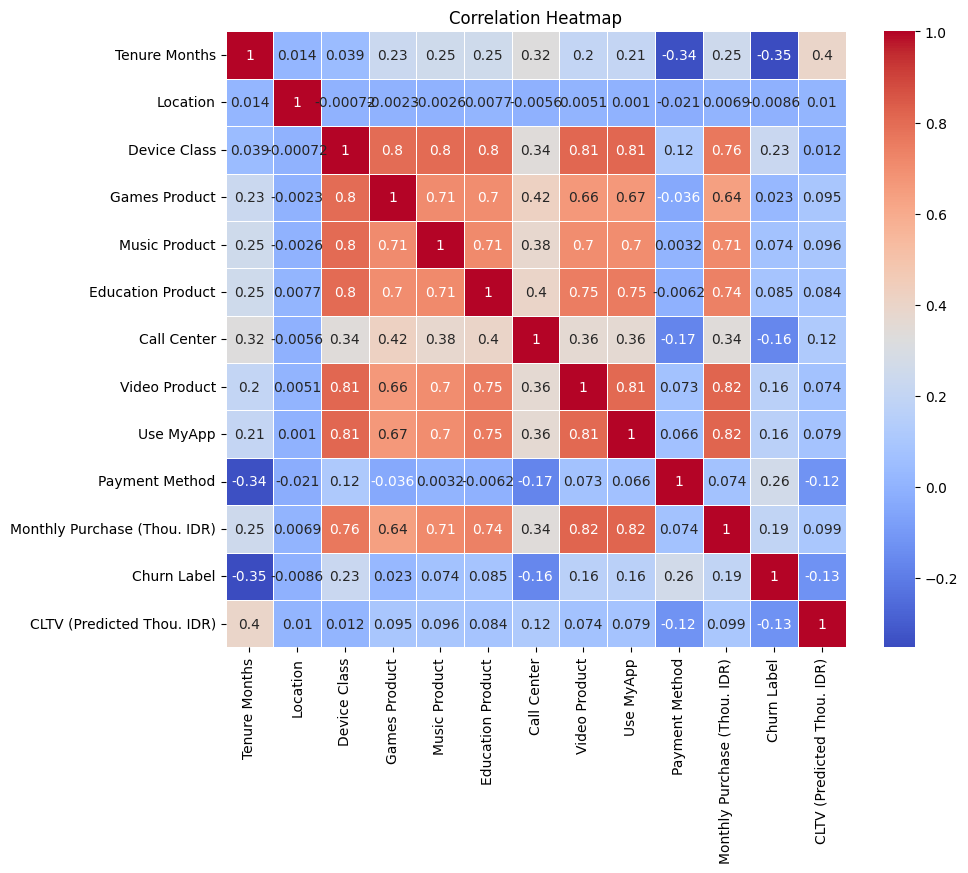

In [7]:
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')  # Set a title
plt.show()

In [8]:
target_column = 'Churn Label'
correlations = correlation_matrix[target_column]

sorted_columns = correlations.abs().sort_values(ascending=False).index
sorted_correlation_matrix = correlation_matrix.reindex(index=sorted_columns, columns=sorted_columns)

print("Sorted Correlation Matrix:")
print(sorted_correlation_matrix)

Sorted Correlation Matrix:
                              Churn Label  Tenure Months  Payment Method  \
Churn Label                      1.000000      -0.352229        0.262818   
Tenure Months                   -0.352229       1.000000       -0.340305   
Payment Method                   0.262818      -0.340305        1.000000   
Device Class                     0.227890       0.039062        0.117102   
Monthly Purchase (Thou. IDR)     0.193356       0.247900        0.074353   
Call Center                     -0.164674       0.324221       -0.167701   
Video Product                    0.164673       0.201053        0.072623   
Use MyApp                        0.163220       0.205031        0.066428   
CLTV (Predicted Thou. IDR)      -0.127463       0.396406       -0.120425   
Education Product                0.084654       0.253999       -0.006230   
Music Product                    0.074205       0.253743        0.003183   
Games Product                    0.023309       0.232373     